# Phase qubit number

- A: 原始的值(不使用$s$, 使用 np)
- B: np 的值(使用$s$, 使用 np)
- C: SVM 的值(使用$s$, 使用 SVM)

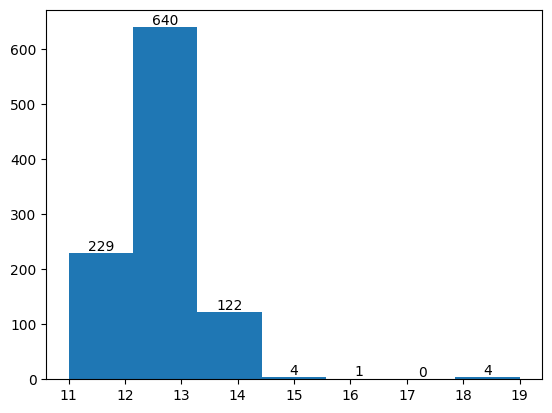

In [5]:
"""查看数据分布"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_name = f"result/phase_qubit_num/phase_qubit_num_2022.csv"
# 读取CSV文件
data = pd.read_csv(file_name)
# 选取数据
df = data[['num_assets', 'A', 'B', 'C']]

subset = df[df['num_assets'] == 8]
str_show = 'B'
n_unique = subset[str_show].nunique()
n, bins, patches = plt.hist(subset[str_show], bins=n_unique)
# 循环遍历每个柱子并添加文本标注
for i in range(len(patches)):
    plt.text(x=bins[i]+(bins[i+1]-bins[i])/2, y=n[i]+5, s=str(int(n[i])), ha='center')
plt.show()

## 作图

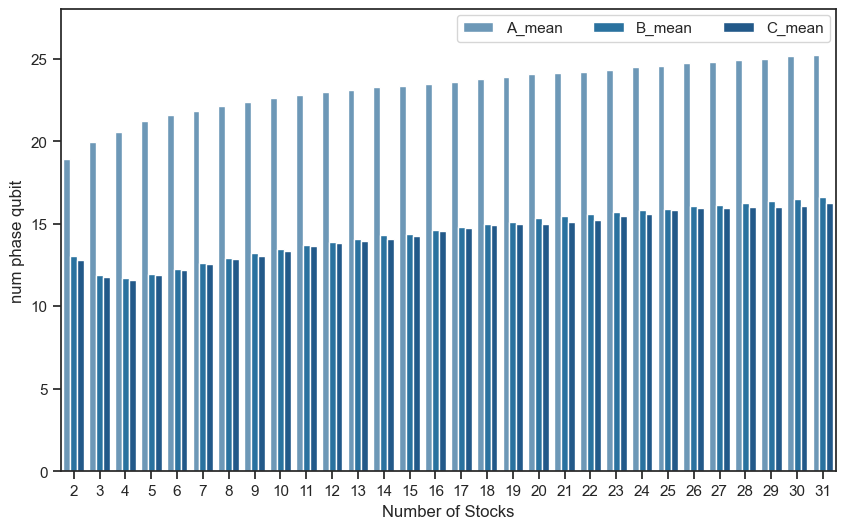

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_name = f"result/phase_qubit_num/phase_qubit_num_2022_result.csv"
# 读取CSV文件
data = pd.read_csv(file_name)
# 选取数据
df = data[['num_assets', 'A_mean', 'B_mean', 'C_mean']]

#subset = df[df['num_assets'] > 2]
subset = df
df_melt = subset.melt('num_assets', var_name='Stat', value_name='Value')
sns.set(style='ticks')

# 创建
fig, ax = plt.subplots(figsize=(10, 6))
# 定义每根柱子的颜色，使用RGB元组
colors = [(97, 154, 195), (22, 119, 179), (17, 90, 154)]
colors = [(r / 255, g / 255, b / 255) for r, g, b in colors]
# 绘制柱状图
sns.barplot(x='num_assets', y='Value', hue='Stat', data=df_melt, 
            palette=colors, ax=ax)

# 调整y轴的刻度范围, 设置刻度范围
ax.set_ylim(0, 23)
# 自定义y轴上的数值标签
# 设置自定义的刻度数量
num_ticks = 6
# 生成等间隔的刻度值
custom_y_ticks = np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], num_ticks)
# 自定义y轴上的刻度标签
custom_y_labels = [f'{int(tick)}' for tick in custom_y_ticks]
# 设置y轴刻度
plt.yticks(custom_y_ticks, custom_y_labels)
# 添加空间
plt.ylim(top=28)  # 调整y轴的上限

# 添加图例，并设置水平显示
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=3, 
          borderaxespad=0.4)

# 设置图表标题和坐标轴标签
# plt.title('Chart')
plt.xlabel('Number of Stocks')
plt.ylabel('num phase qubit')

# 设置图像的分辨率
dpi = 300  # 设置dpi值
# 保存图像
output_filename = f"image/phase_qubit_num/result_2_31.pdf"
plt.savefig(output_filename, dpi=dpi, bbox_inches='tight')

# 显示图表
plt.show()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_name = f"result/phase_qubit_num_2022.csv"
# 读取CSV文件
data = pd.read_csv(file_name)
# 选取数据
df = data[['num_assets', 'A', 'B', 'C']]

# 计算每个num_assets的均值和方差
grouped = df.groupby('num_assets').agg(['mean'])

# 重命名列名
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]

# 保存结果到CSV文件
grouped.to_csv('output.csv')